In [1]:
no <- 1:4
name <- c("Apple", 'Banana', "Peach", "Berry")
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

In [2]:
# 데이터프레임으로 합치기
fruit <- data.frame(번호=no,제품=name,금액=price,수량=qty)
fruit

번호,제품,금액,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [3]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "fruit" "name"  "no"    "price" "qty"

In [4]:
# 메모리 형태로 파일 보관
save(no, fruit, name, file="../Data/testFruit.txt") 
# 파일 형태는 아무거나 상관 없음

In [5]:
rm(no, fruit, name)

In [6]:
# 메모리로 불러오기
load("../Data/testFruit.txt")

In [7]:
# fruit를 csv로 저장하기 
write.csv(fruit, "../Data/fruit.csv")

In [8]:
fruit2 <- read.csv("../Data/fruit.csv") # x라는 컬럼이 하나 추가되었다. x = rownames

In [9]:
write.csv(fruit2, "../Data/fruit2.csv")

In [10]:
# rownames가 계속 쌓인다
read.csv("../Data/fruit2.csv") 

X.1,X,번호,제품,금액,수량
1,1,1,Apple,500,5
2,2,2,Banana,200,4
3,3,3,Peach,200,3
4,4,4,Berry,50,2


In [11]:
# 저장시 주의 사항 : row names가 필요치 않으면 저장하지 말아야 한다.
write.csv(fruit, "../Data/fruit.csv", row.names=F)

In [12]:
read.csv("../Data/fruit.csv")

번호,제품,금액,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


# 세계 GDP 순위 데이터 정제 및 차트 만들기

In [13]:
# Data Set 불러오기 
GDP_ranking <- read.csv("../Data/GDP.csv") 
head(GDP_ranking, 10)
tail(GDP_ranking ,10)
# 우리가 필요한 데이터 나라,순위,이름,값

X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,,NA,,,
,,NA,,(millions of,
,Ranking,NA,Economy,US dollars),
,,NA,,,
USA,1,NA,United States,"20,494,100",
CHN,2,NA,China,"13,608,152",
JPN,3,NA,Japan,"4,970,916",
DEU,4,NA,Germany,"3,996,759",
GBR,5,NA,United Kingdom,"2,825,208",
FRA,6,NA,France,"2,777,535",


,X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
319,,,NA,,,
320,,,NA,,,
321,,,NA,,,
322,,,NA,,,
323,,,NA,,,
324,,,NA,,,
325,,,NA,,,
326,,,NA,,,
327,,,NA,,,
328,,,NA,,,


In [14]:
GDP_ranking2 <- GDP_ranking[-c(1:4),c(1,2,4,5)]
head(GDP_ranking2)

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [15]:
# 상위 15개국만 선별한다.
GDP_ranking15 <- GDP_ranking2[c(1:15),]
#GDP_ranking15 <- head(GDP_ranking2, 15)
GDP_ranking15

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [16]:
# 컬럼이름 정의 : Code, Ranking, Nation, GDP
colnames(GDP_ranking15) <- c('Code', 'Ranking', 'Nation', 'GDP')
GDP_ranking15

,Code,Ranking,Nation,GDP
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [17]:
# rownames 새로 구성하기 (인덱스 번호 정리하기)
rownames(GDP_ranking15) <- c()
print(GDP_ranking15)

   Code Ranking             Nation          GDP
1   USA       1      United States  20,494,100 
2   CHN       2              China  13,608,152 
3   JPN       3              Japan   4,970,916 
4   DEU       4            Germany   3,996,759 
5   GBR       5     United Kingdom   2,825,208 
6   FRA       6             France   2,777,535 
7   IND       7              India   2,726,323 
8   ITA       8              Italy   2,073,902 
9   BRA       9             Brazil   1,868,626 
10  CAN      10             Canada   1,712,510 
11  RUS      11 Russian Federation   1,657,554 
12  KOR      12        Korea, Rep.   1,619,424 
13  AUS      13          Australia   1,432,195 
14  ESP      14              Spain   1,426,189 
15  MEX      15             Mexico   1,223,809 


In [18]:
# 구조 확인
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 230 levels "","ABW","AFG",..: 216 38 103 52 72 68 94 100 28 34 ...
 $ Ranking: Factor w/ 212 levels "",".. Not available.  ",..: 3 114 131 142 153 164 175 186 197 4 ...
 $ Nation : Factor w/ 231 levels "","Afghanistan",..: 219 43 104 78 218 73 95 102 28 37 ...
 $ GDP    : Factor w/ 220 levels ""," .. "," 1,022 ",..: 78 44 137 113 77 75 74 67 20 19 ...


In [19]:
# Factor의 갯수가 15개가 정상일텐데 200개 이상이다 이상하다. -> 재구성 해야한다.
GDP_ranking15$Code <- factor(GDP_ranking15$Code) 

In [20]:
# for
for(i in 1:ncol(GDP_ranking15)){
    GDP_ranking15[,i] <- factor(GDP_ranking15[,i])
}

In [21]:
library(stringr)


Attaching package: ‘stringr’

The following object is masked _by_ ‘.GlobalEnv’:

    fruit



In [22]:
# GDP 숫자로 변환 (천단위 쉼표 정리)
GDP_ranking15$GDP <- as.numeric(str_remove_all(GDP_ranking15$GDP, ','))
GDP_ranking15
str(GDP_ranking15)

Code,Ranking,Nation,GDP
USA,1,United States,20494100
CHN,2,China,13608152
JPN,3,Japan,4970916
DEU,4,Germany,3996759
GBR,5,United Kingdom,2825208
FRA,6,France,2777535
IND,7,India,2726323
ITA,8,Italy,2073902
BRA,9,Brazil,1868626
CAN,10,Canada,1712510


'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : num  20494100 13608152 4970916 3996759 2825208 ...


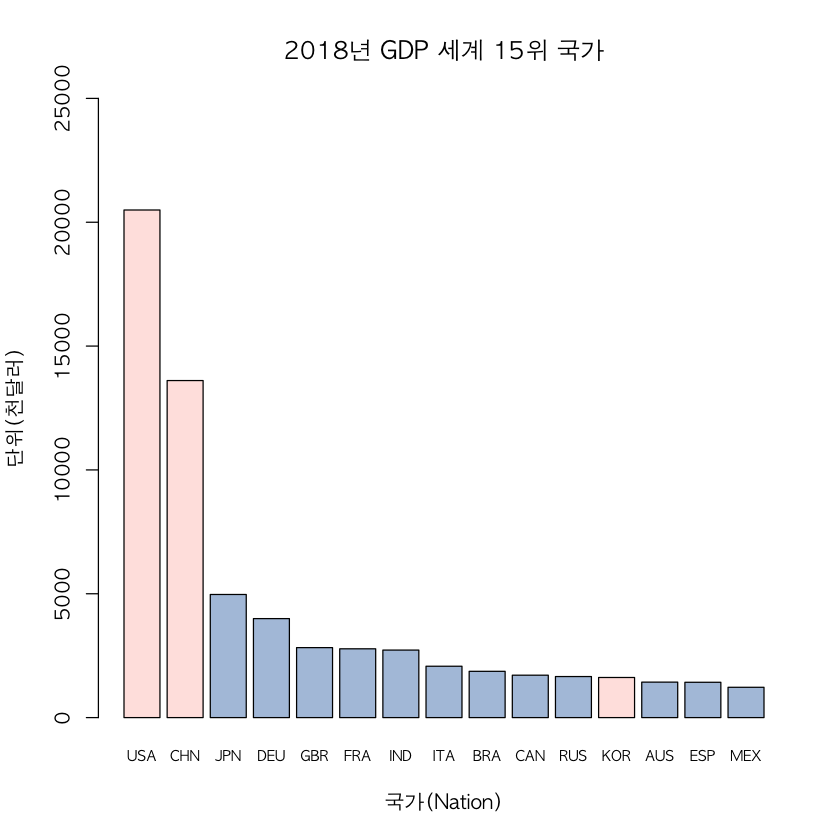

In [23]:
# 막대그래프 그리기
options(scipen=100)
options(warn = -1)
par(family = 'AppleGothic')
barplot(GDP_ranking15$GDP / 1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        #col = c(rep("mistyrose",2), rep("lavender",9), "mistyrose", rep('lavender',3)),
        col = ifelse(GDP_ranking15$Code == c('USA','CHN','KOR'), "mistyrose", "Light steel blue"),
        ylim = c(0 , 25000)
     )

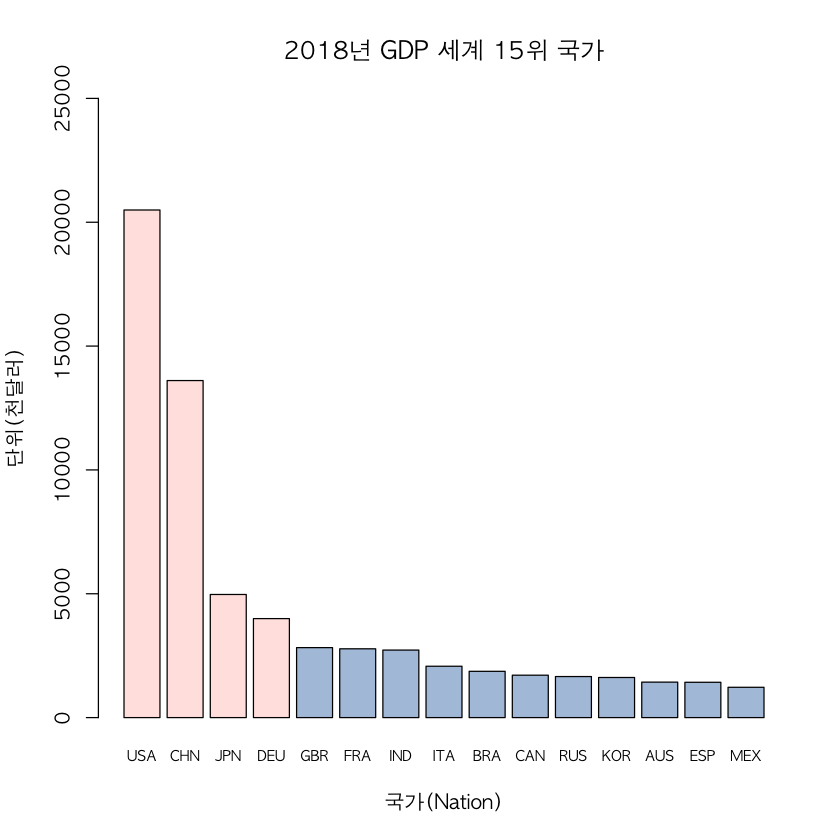

In [24]:
# GDP가 3000 이상인 국가 만 빨간색으로 표시하기
options(scipen=100)
options(warn = -1)
par(family = 'AppleGothic')
barplot(GDP_ranking15$GDP / 1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        col = ifelse(GDP_ranking15$GDP/1000 >= 3000, "mistyrose", "Light steel blue"),
        ylim = c(0 , 25000)
     )


---
# 데이터 처리
##### 주구장창 쓸거임

In [25]:
# 데이터 정렬하기
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [26]:
# iris Sepal.length 기준으로 오름차순 정렬하기
# 1차 정렬
head(arrange(iris, Sepal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,2.9,1.4,0.2,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.1,1.5,0.2,setosa


In [27]:
# iris Sepal.Length 기준으로 정령 후 동일한 크기를 가진 데이터 발생 시 Petal.Length 기준으로 오름차순 정렬
# 1차 정렬, 2차 정렬
head(arrange(iris, Sepal.Length, Petal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.6,1.0,0.2,setosa


In [28]:
# Sepal.Length 기준으로 내림차순 정렬
# 내림차순 할 컬럼에 desc() 를 걸어주면 된다.
head(arrange(iris, desc(Sepal.Length)))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.9,3.8,6.4,2.0,virginica
7.7,3.8,6.7,2.2,virginica
7.7,2.6,6.9,2.3,virginica
7.7,2.8,6.7,2.0,virginica
7.7,3.0,6.1,2.3,virginica
7.6,3.0,6.6,2.1,virginica


In [29]:
# Sepal.Length 기준으로 내림차순 정렬 후 Sepal.Length와 Sepal.Width 만 보기
head(arrange(iris, desc(Sepal.Length))[,1:2])
head(arrange(iris[,1:2], desc(Sepal.Length)))

Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


---
# 샘플링(Sampling)
- 샘플링한 데이터가 모집단의 의미를 가지고 있어야 가치가 있다. (meaningful)
- 특징을 알아야 샘플링을 할 수 있다

In [30]:
# 랜덤 샘플링 (중복값을 허용하지 않음)
sample(1:45 , 6)

[1]  3 37  9 36 26  4

In [31]:
nrow(iris)
ncol(iris)

[1] 150

[1] 5

In [32]:
samp <- sample(1:nrow(iris), nrow(iris)*0.7)
head(samp)

[1] 112 133  39  49  67  55

In [33]:
irisSamp <- iris[samp,]
head(irisSamp)
summary(irisSamp) # Species 종이 1:1:1 인 특성이 망가졌다. 샘플 실패 # 특징을 알아야 샘플링을 할 수 있다
summary(iris) 
table(irisSamp$Species)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
112,6.4,2.7,5.3,1.9,virginica
133,6.4,2.8,5.6,2.2,virginica
39,4.4,3.0,1.3,0.2,setosa
49,5.3,3.7,1.5,0.2,setosa
67,5.6,3.0,4.5,1.5,versicolor
55,6.5,2.8,4.6,1.5,versicolor


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.825   Mean   :3.055   Mean   :3.757   Mean   :1.193  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:35  
 virginica :35  
                
                
                

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


    setosa versicolor  virginica 
        35         35         35 

In [34]:
# iris Sampling시 Species 별로 Sampling 한다
samp <- c(sample(1:50, 35) , sample(55:100, 35) , sample(101:150, 35))


In [35]:
irisSamp <- iris[samp,]
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         35         35 

In [36]:
# Training DAta와 Test Data 분리하기
iris.train <- iris[samp,]
iris.test <- iris[-samp,]

In [37]:
summary(iris.train)
summary(iris.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.812   Mean   :3.047   Mean   :3.736   Mean   :1.208  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:35  
 virginica :35  
                
                
                

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.400   Min.   :2.200   Min.   :1.400   Min.   :0.10   setosa    :15  
 1st Qu.:5.200   1st Qu.:2.900   1st Qu.:1.600   1st Qu.:0.20   versicolor:15  
 Median :5.900   Median :3.100   Median :4.500   Median :1.40   virginica :15  
 Mean   :5.916   Mean   :3.082   Mean   :3.809   Mean   :1.18                  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.200   Max.   :6.400   Max.   :2.50                  

--- 
# 부분 집합

In [38]:
# iris에서 Species가 Setosa인 것만 추출하여 iris_setosa라는 데이터프레임 만들기
iris_setosa <- subset(iris, Species == 'setosa')
head(iris_setosa)
summary(iris_setosa)
str(iris_setosa)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       Species  
 setosa    :50  
 versicolor: 0  
 virginica : 0  
                
                
                

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [39]:
iris_setosa$Species <- factor(iris_setosa$Species)
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [40]:
# iris 에서 Species가 versicolor인 것만 추출하여 iris_versicolor라는 데이터프레임 만들기
iris_versicolor <- subset(iris, Species == 'versicolor')
iris_versicolor$Species <- factor(iris_versicolor$Species)
rownames(iris_versicolor) = c()
str(iris_versicolor)
print(iris_versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...
   Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1           7.0         3.2          4.7         1.4 versicolor
2           6.4         3.2          4.5         1.5 versicolor
3           6.9         3.1          4.9         1.5 versicolor
4           5.5         2.3          4.0         1.3 versicolor
5           6.5         2.8          4.6         1.5 versicolor
6           5.7         2.8          4.5         1.3 versicolor
7           6.3         3.3          4.7         1.6 versicolor
8           4.9         2.4          3.3         1.0 versicolor
9           6.6         2.9          4.6         1.3 v

In [41]:
# iris에서 Species가 setosa이고 Sepal.Length가 5 보다 큰 sample(data)의 갯수는?
nrow(subset(iris, Species == 'setosa' & Sepal.Length > 5))
subset(iris, Species == 'setosa' & Sepal.Length > 5)

[1] 22

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
11,5.4,3.7,1.5,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
17,5.4,3.9,1.3,0.4,setosa
18,5.1,3.5,1.4,0.3,setosa
19,5.7,3.8,1.7,0.3,setosa
20,5.1,3.8,1.5,0.3,setosa
21,5.4,3.4,1.7,0.2,setosa


In [42]:
# subset으로 컬럼 지우기 (행지우기는어렵)
subset(iris, select = c(Sepal.Length, Species))
subset(iris, select = -Species)

Sepal.Length,Species
5.1,setosa
4.9,setosa
4.7,setosa
4.6,setosa
5.0,setosa
5.4,setosa
4.6,setosa
5.0,setosa
4.4,setosa
4.9,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


---
# 그룹 연산 함수
- 많이 사용할거임
- y = ax + b 를 y ~ x (이렇게 사용하는 것이 틸트)

In [43]:
# iris에서 Species 기준으로 Sepal.Width 의 평균 구하기
aggregate( Sepal.Width ~ Species, iris, mean) # 알아서 그룹핑 해서 평균을 내준다

Species,Sepal.Width
setosa,3.428
versicolor,2.770
virginica,2.974


---
# 서울시 교통사고 조사 데이터셋 

In [44]:
# 데이터셋을 불러와서 seoul이라는 변수에 넣기
seoul <- read.csv(("../Data/newSeoul2019.csv") )
head(seoul)
tail(seoul) 
str(seoul) 
summary(seoul) # 정규분포가 오른쪽,높은쪽으로 쏠려있음

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [45]:
# 서울 데이터의 NA 찾기 
sum(is.na(seoul)) # 여기서 일차적으로 확인하고 0 이면 패스 , 값이 있으면 컬럼별 NA값을 확인한다

for(i in 1: ncol(seoul)){
    cat( colnames(seoul)[i], ":" , sum(is.na(seoul[,i])) ,"\n")
}

[1] 0

년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


## 컬럼별 데이터 확인

In [46]:
# 년도별 데이터가 동일한지 확인
table(seoul$년도)

# 월 별
table(seoul$월)

# 자치구 별
table(seoul$자치구)




2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

## 분석 시작

In [47]:
# 자치구별 발생건수의 평균
regionAcc.mean <- aggregate( 발생건수 ~ 자치구명, seoul , mean)
head(regionAcc.mean)

자치구명,발생건수
강남구,306.3611
강동구,118.5370
강북구,101.7870
강서구,145.4722
관악구,128.3889
광진구,103.0741


In [48]:
# regionAcc.mean을 발생건수 기준으로 내림차순 정렬하기
arrange(regionAcc.mean, desc(발생건수))
# 평균값을 믿어도 되는지 ?

자치구명,발생건수
강남구,306.36111
송파구,224.75926
영등포구,194.64815
서초구,186.48148
동대문구,153.64815
강서구,145.47222
마포구,141.51852
중랑구,138.46296
성북구,130.85185
노원구,129.21296


> 4/28  수업 끗

In [56]:
# 평균과 데이터의 차이를 봐야한다(표준편차) 편차가 큰 데이터는 의미가 없다
# 자치구 별 표준 편차
regionAcc.sd <- aggregate( 발생건수 ~ 자치구명, seoul , sd)
head(regionAcc.sd)

자치구명,발생건수
강남구,32.92968
강동구,15.24836
강북구,14.80784
강서구,19.66659
관악구,22.62611
광진구,21.85582


In [69]:
# 자치구별 발생건수의 변동계수
# 변동계수 cv = 표준편차 / 평균
regionAcc.cv <- regionAcc.sd$발생건수 / regionAcc.mean$발생건수  
regionAcc.cv

[1] 0.1074865 0.1286380 0.1454786 0.1351914 0.1762311 0.2120399 0.1247490
 [8] 0.1792845 0.1269958 0.1574197 0.1478347 0.1428743 0.1279873 0.1332123
[15] 0.1267878 0.1499687 0.1401772 0.1341341 0.1411315 0.1177098 0.1501245
[22] 0.1849940 0.1586624 0.1581133 0.1285712

In [76]:
# 자치구명과 변동계수를 가진 dataframe 만들기
regionAcc <- data.frame(자치구명 = regionAcc.sd$자치구명, 변동계수=regionAcc.cv)
# regionAcc
# 정렬
arrange(regionAcc, 변동계수) # 작은값이 빈번하다는뜻이다. = 확률이 빈번하게 바뀐다.
# 강남,영등포구 경기도권에서 서울 들어오는 입구들, 트럭이 많다, 대로라서 달리는 차가 많다, 인구가 많다, 교통량이 많다. 그 외 경기도에서 서울로 들어오는 입구 쪽 동네들이 높다 

자치구명,변동계수
강남구,0.1074865
영등포구,0.1177098
구로구,0.1247490
서초구,0.1267878
노원구,0.1269958
마포구,0.1279873
중랑구,0.1285712
강동구,0.1286380
서대문구,0.1332123
송파구,0.1341341


In [211]:
# 서울시 교통사고 부상자수에 대한 변동계수 구하기 
in_mean <- aggregate( 부상자수~ 자치구명, seoul , mean)
in_sd <- aggregate( 부상자수~ 자치구명, seoul , sd)
in_cv <- insd$부상자수 / inmean$부상자수 
regionInjure <- data.frame(자치구명 = inmean$자치구명 , 변동계수 = incv)
arrange(regionInjure, 변동계수)

자치구명,변동계수
강남구,0.1125485
영등포구,0.1258837
노원구,0.1283799
송파구,0.1297795
서초구,0.1352681
강북구,0.1356240
중랑구,0.1405188
구로구,0.1408256
강동구,0.1427554
성북구,0.1486599


In [223]:
# 서울시 교통사고 사망자수에 대한 변동계수 구하기 
de_mean <- aggregate( 사망자수~ 자치구명, seoul , mean)
de_sd <- aggregate( 사망자수~ 자치구명, seoul , sd)
de_cv <- de_sd$사망자수 / de_mean$사망자수 
regionDeath <- data.frame(자치구명 = de_mean$자치구명 , 변동계수 = de_cv)
arrange(regionDeath, 변동계수) # 영등포, 강동구, 노원 등 외곽에서 서울들어오는 동네 한번 사고나면 크게 사고가 난다, 중구 길이 좁아 달릴수가 없어 큰 사고가 안난다, 강남 접촉사고가 많다

자치구명,변동계수
영등포구,0.6293361
강동구,0.7663838
강남구,0.7864080
송파구,0.8062102
서초구,0.8277334
노원구,0.8443981
은평구,0.8527234
강서구,0.8635127
관악구,0.9202590
종로구,0.9332813


상관계수 correlation ship

0 ~ 0.3 : 상관없음 
0.3 ~ 0.5 : 약한 관계
0.5 ~ 0.7: 관계 있음
0.7 ~ : 강한 관계

In [224]:
# 교통사고 발생건수와 부상자수의 관계 : 상관계수 correlationship
cor(seoul$발생건수, seoul$부상자수) 
# 98% 관계가 있다. 발생건수가 증가할수록 부상자수도 증가한다 ; 그 정도가 98%이다 
#// 이런 관계를 보는것이 correlationship, 머신러닝에도 많이 나온다

[1] 0.9808932

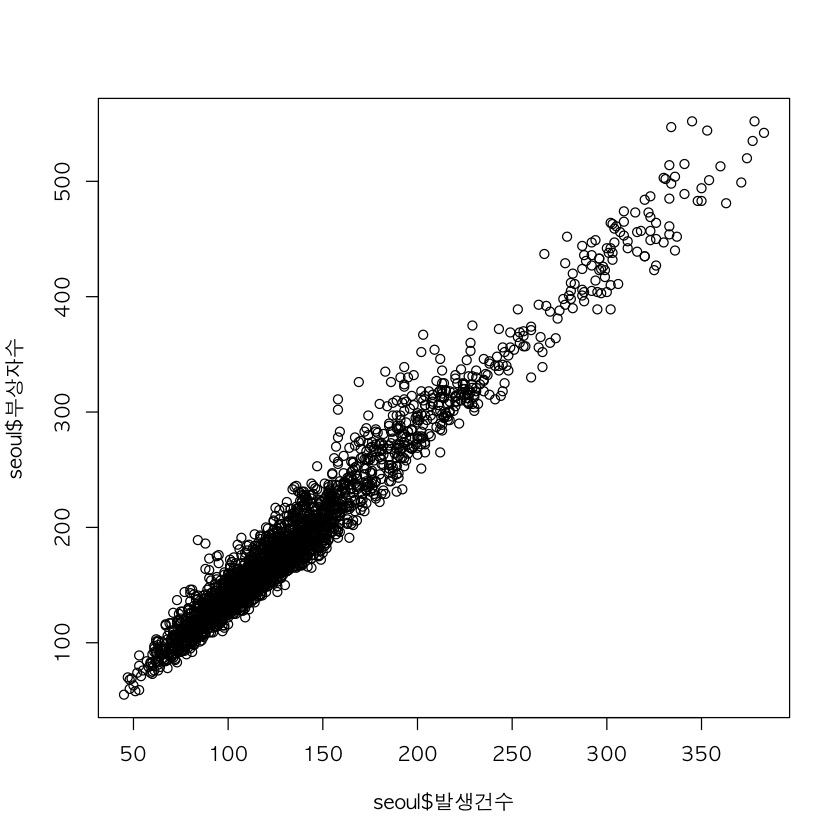

In [225]:
par(family = "AppleGothic")
plot(seoul$발생건수 ,seoul$부상자수) # 정규분포 성립


In [226]:
# 교통사고 발생건수와 사망자수의 관계 : 상관계수
cor(seoul$발생건수, seoul$사망자수) # 24% 관련없다 , 사망자수가 교통사고수와 관계가 있으면 후진국이다.


[1] 0.2387148

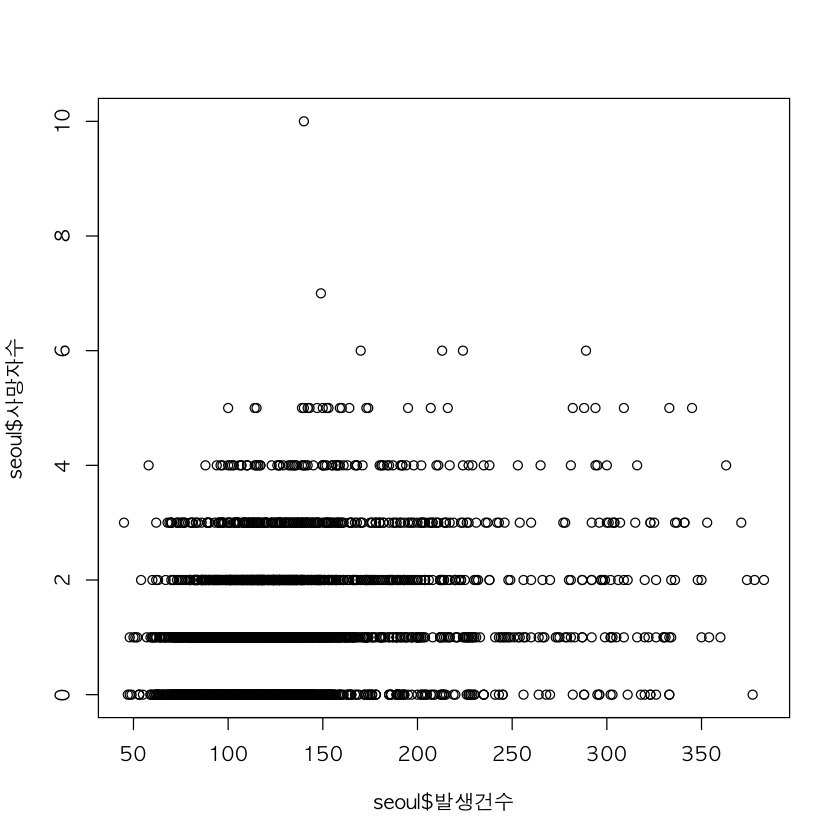

In [227]:
par(family = "AppleGothic")
plot(seoul$발생건수 ,seoul$사망자수) # 의미없는 데이터

In [228]:
# 교통사고 부상자수와 사망자수의 관계
cor(seoul$부상자수, seoul$사망자수) # 24% 관련이 없다. 부상 - 사망 관계가 있으면 후진국이다.


[1] 0.2373019

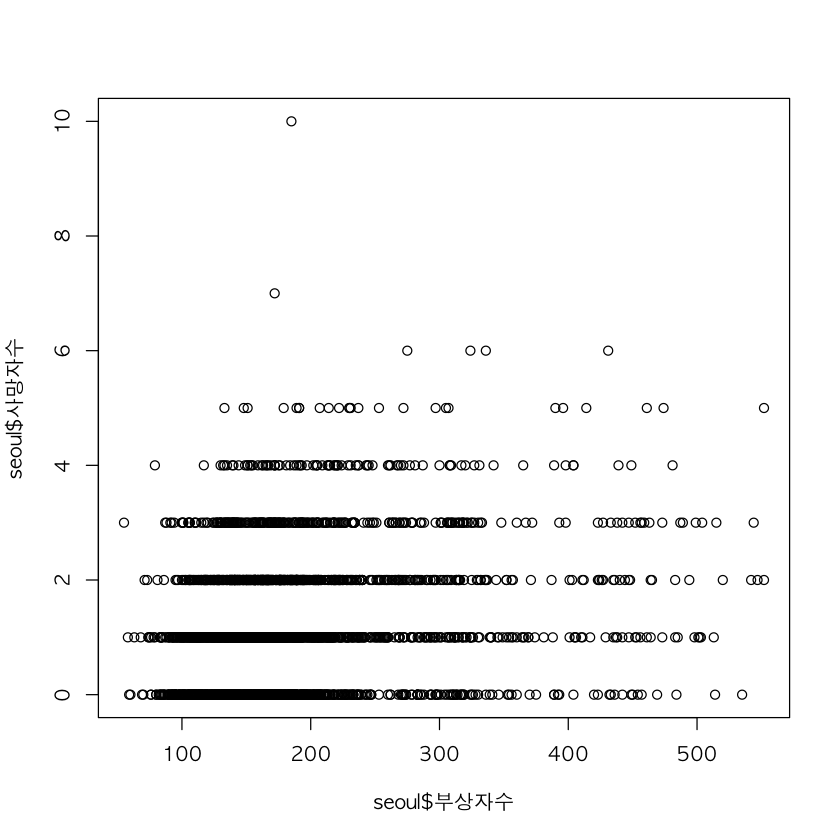

In [229]:
par(family = "AppleGothic")
plot(seoul$부상자수 ,seoul$사망자수) # 의미없는 데이터

--- 
# 팀플

In [270]:
region1 <- in_mean$자치구명
region <- in_mean$자치구명
region <- as.character(region)
region1

[1] 강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구  
 [9] 노원구   도봉구   동대문구 동작구   마포구   서대문구 서초구   성동구  
[17] 성북구   송파구   양천구   영등포구 용산구   은평구   종로구   중구    
[25] 중랑구  
25 Levels: 강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 ... 중랑구

In [266]:
# 년도별 교통사고 발생,부상,사망자수에 대한 분석 자치구별로 나눔
seoul.region <- data.frame()
for(i in 2011:2019){
    for(j in 1:25){
        seoul.region <- rbind( seoul.region , c( i , region1[j], apply(subset(seoul, 년도 == i & 자치구명 == region1[j])[,4:6], 2 , sum) ) )
    }
}
seoul.region

X2011L,X1L,X3562L,X36L,X5184L
2011,1,3562,36,5184
2011,2,1423,13,2080
2011,3,1174,7,1648
2011,4,1885,16,2740
2011,5,1737,17,2396
2011,6,1430,23,2033
2011,7,1542,15,2226
2011,8,1125,10,1649
2011,9,1529,14,2231
2011,10,933,15,1279


In [304]:
colnames(seoul.region) <- c('년도', '자치구', '발생건수','사망자수','부상자수' )
#seoul.region
arrange(seoul.region, 자치구)

년도,자치구,발생건수,사망자수,부상자수
2011,1,3562,36,5184
2012,1,3843,25,5666
2013,1,3610,31,5326
2014,1,3624,17,5269
2015,1,3970,20,5686
2016,1,3828,12,5445
2017,1,3469,19,4959
2018,1,3459,20,4967
2019,1,3722,14,5182
2011,2,1423,13,2080


In [242]:
city <- in_mean$자치구명
seoul.all <- data.frame()
for(i in 2011:2019){
        seoul.all <- rbind( seoul.all , c( i , apply(subset(seoul.city, 년도 == i)[,3:5], 2 , sum) ) )
}
seoul.all

X2011L,X40451L,X435L,X57625L
2011,40451,435,57625
2012,40829,424,58583
2013,39439,378,56761
2014,40792,400,57345
2015,41665,376,58656
2016,40039,348,55669
2017,38625,343,53810
2018,38795,304,53751
2019,39258,250,53904


In [244]:
colnames(seoul.all) <- c('년도', '발생건수','사망자수','부상자수' )
seoul.all

년도,발생건수,사망자수,부상자수
2011,40451,435,57625
2012,40829,424,58583
2013,39439,378,56761
2014,40792,400,57345
2015,41665,376,58656
2016,40039,348,55669
2017,38625,343,53810
2018,38795,304,53751
2019,39258,250,53904


In [ ]:
options(scipen=100)
options(warn = -1)
par(family = 'AppleGothic')
barplot(GDP_ranking15$GDP / 1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        #col = c(rep("mistyrose",2), rep("lavender",9), "mistyrose", rep('lavender',3)),
        col = ifelse(GDP_ranking15$Code == c('USA','CHN','KOR'), "mistyrose", "Light steel blue"),
        ylim = c(0 , 25000)
     )

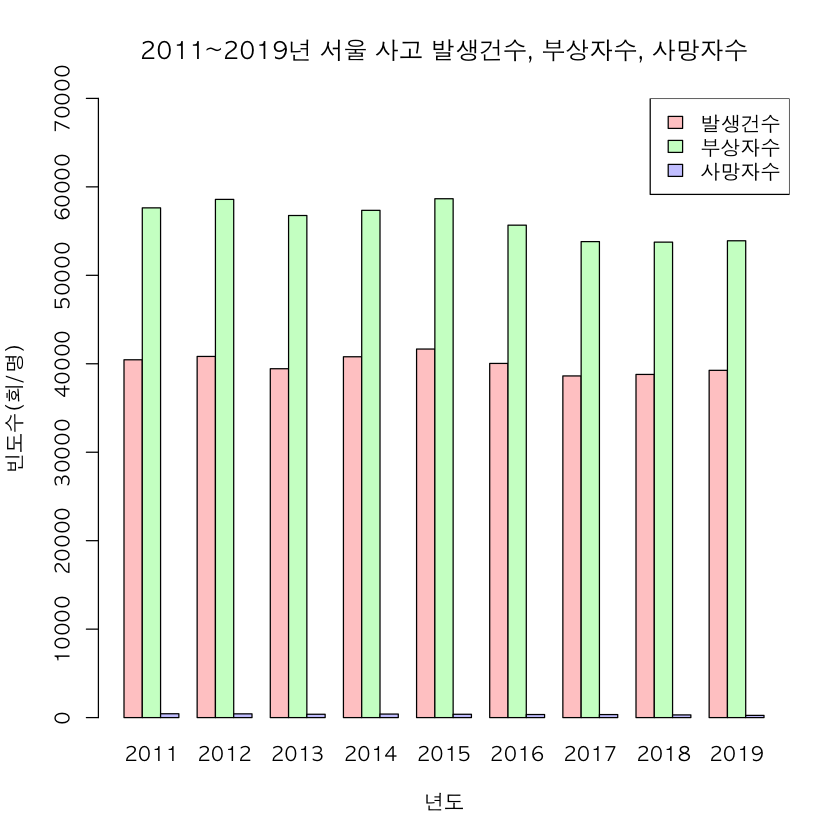

In [309]:
# 정책 속도제한? , 
my_col=rainbow(3,s=0.2)
par(family = 'AppleGothic')
barplot(rbind(seoul.all$발생건수,seoul.all$부상자수,seoul.all$사망자수),
        names= seoul.all$년도,
        beside = T,
        main="2011~2019년 서울 사고 발생건수, 부상자수, 사망자수",xlab="년도",ylab="빈도수(회/명)",
        ylim=c(0,70000),
        col = my_col
        )
legend("topright",legend=c("발생건수","부상자수","사망자수"),fill= my_col)


In [298]:
#byYear <- 
aggregate(cbind(발생건수=seoul$발생건수, 사망자수=seoul$사망자수, 부상자수=seoul$부상자수)~seoul$년도, FUN=sum)

seoul$년도,발생건수,사망자수,부상자수
2011,40451,435,57625
2012,40829,424,58583
2013,39439,378,56761
2014,40792,400,57345
2015,41665,376,58656
2016,40039,348,55669
2017,38625,343,53810
2018,38795,304,53751
2019,39258,250,53904


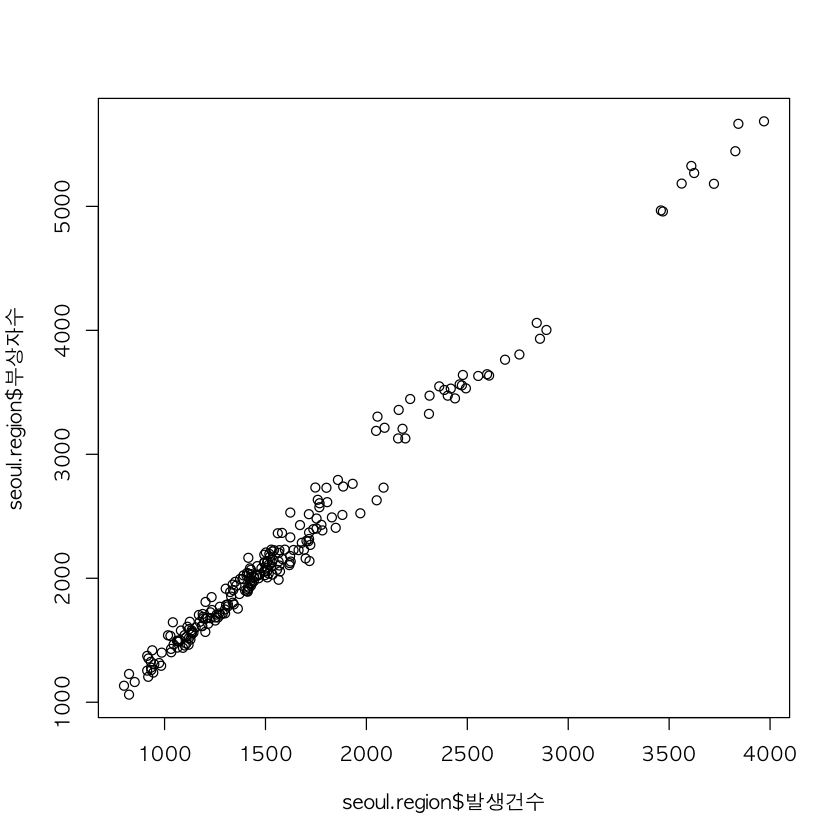

In [299]:
par(family = "AppleGothic")
plot(seoul.region$발생건수 ,seoul.region$부상자수)


In [300]:
summary(seoul.region)
summary(seoul.all)

      년도          자치구      발생건수       사망자수        부상자수   
 Min.   :2011   Min.   : 1   Min.   : 799   Min.   : 3.00   Min.   :1061  
 1st Qu.:2013   1st Qu.: 7   1st Qu.:1212   1st Qu.:11.00   1st Qu.:1684  
 Median :2015   Median :13   Median :1459   Median :13.00   Median :2033  
 Mean   :2015   Mean   :13   Mean   :1600   Mean   :14.48   Mean   :2249  
 3rd Qu.:2017   3rd Qu.:19   3rd Qu.:1722   3rd Qu.:17.00   3rd Qu.:2401  
 Max.   :2019   Max.   :25   Max.   :3970   Max.   :36.00   Max.   :5686  

      년도         발생건수        사망자수      부상자수    
 Min.   :2011   Min.   :38625   Min.   :250   Min.   :53751  
 1st Qu.:2013   1st Qu.:39258   1st Qu.:343   1st Qu.:53904  
 Median :2015   Median :40039   Median :376   Median :56761  
 Mean   :2015   Mean   :39988   Mean   :362   Mean   :56234  
 3rd Qu.:2017   3rd Qu.:40792   3rd Qu.:400   3rd Qu.:57625  
 Max.   :2019   Max.   :41665   Max.   :435   Max.   :58656  